In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywrdrb 

# from pywrdrb.utils.hdf5 import extract_realization_from_hdf5
# from pywrdrb.utils.hdf5 import get_hdf5_realization_numbers

from sglib.utils.load import HDF5Manager
from sglib.utils.load import load_drb_reconstruction
from sglib.droughts.ssi import SSIDroughtMetrics
from config import gage_flow_ensemble_fname, catchment_inflow_ensemble_fname
from config import FIG_DIR, RECONSTRUCTION_OUTPUT_FNAME, STATIONARY_ENSEMBLE_OUTPUT_FNAME

### Loading data
## Historic reconstruction data
# Total flow
Q = load_drb_reconstruction()
Q.replace(0, np.nan, inplace=True)
Q.drop(columns=['delTrenton'], inplace=True)  # Remove Trenton gage as it is not used in the ensemble

# Catchment inflows
Q_inflows = load_drb_reconstruction(gage_flow=False)
Q_inflows.replace(0, np.nan, inplace=True)
Q_inflows.drop(columns=['delTrenton'], inplace=True)  # Remove Trenton gage as it is not used in the ensemble

print(f"Loaded reconstruction data with {Q.shape[0]// 365} years of daily data for {Q.shape[1]} sites.")

Q_monthly = Q.resample('MS').sum()



Loaded reconstruction data with 79 years of daily data for 30 sites.


In [26]:

data = pywrdrb.Data(results_sets=['major_flow', 
                                  'mrf_targets',
                                  'ibt_diversions', 'ibt_demands'], 
                    print_status=True)
data.load_observations()
data.load_output(output_filenames=[RECONSTRUCTION_OUTPUT_FNAME,
                                   STATIONARY_ENSEMBLE_OUTPUT_FNAME])


Loading observations data sets ['major_flow']...
Loading major_flow data from observations
Loading pywrdrb output data...
Loading major_flow data from reconstruction
Loading major_flow data from stationary_ensemble
Loading mrf_targets data from reconstruction
Loading mrf_targets data from stationary_ensemble
Loading ibt_diversions data from reconstruction
Loading ibt_diversions data from stationary_ensemble
Loading ibt_demands data from reconstruction
Loading ibt_demands data from stationary_ensemble


<Axes: ylabel='Density'>

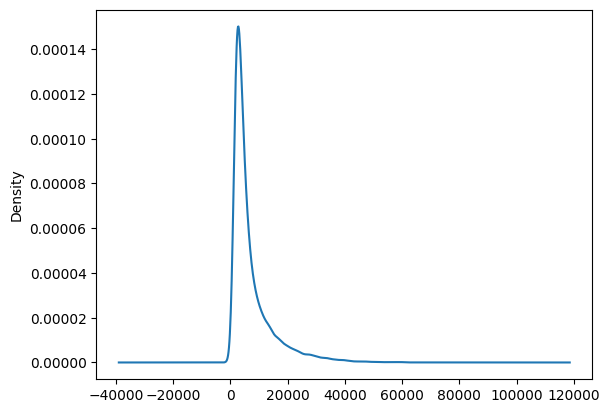

In [27]:
data.major_flow['reconstruction'][0].loc[:, 'delTrenton'].plot(kind='kde')

(0.0, 10000.0)

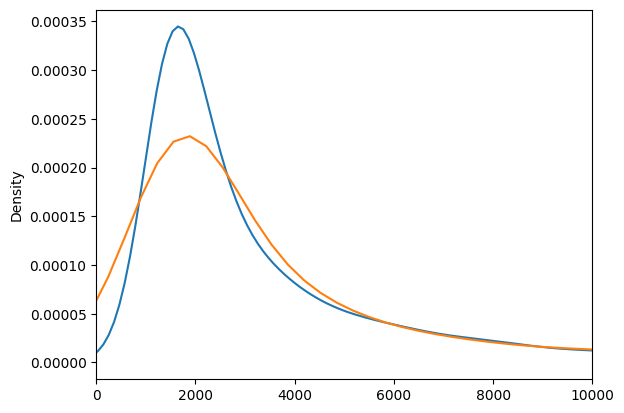

In [28]:
data.major_flow['reconstruction'][0].loc[:, 'delMontague'].plot(kind='kde')
data.major_flow['stationary_ensemble'][0].loc[:, 'delMontague'].plot(kind='kde')
plt.xlim(0, 10000)

<Axes: >

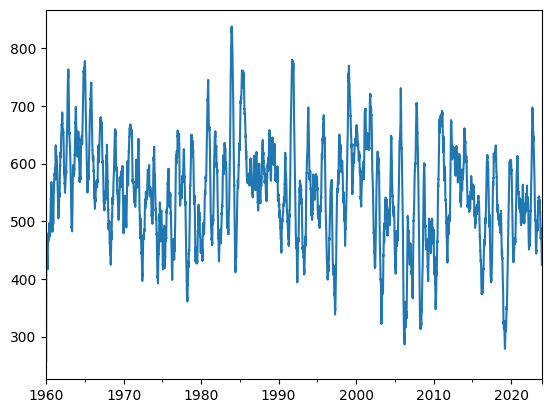

In [32]:
data.ibt_demands['reconstruction'][0].loc['1960-01-01':, 'demand_nyc'].rolling('180D').mean().plot()